In [10]:
import os
import torch
import sys
sys.path.append('../../')

In [11]:
def set_num_threads(nt):
    "Get numpy (and others) to use `nt` threads"
    try: import mkl; mkl.set_num_threads(nt)
    except: pass
    torch.set_num_threads(nt)
    os.environ['IPC_ENABLE']='1'
    for o in ['OPENBLAS_NUM_THREADS','NUMEXPR_NUM_THREADS','OMP_NUM_THREADS','MKL_NUM_THREADS']:
        os.environ[o] = str(nt)

In [12]:
set_num_threads(8)

In [13]:
import libtiff
import imageio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import fastai as fai
import fastai.vision as faiv
import fastai.callbacks as faic
import data.utils
import data.svd

In [14]:
# Modify accordingly
path = faiv.Path('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

# dataset_name = 'real-world_SEM'

lr_name = f'training/trainsets/crappified/'
lr_path = path/f'{lr_name}'
lr_files = sorted(list(lr_path.glob('*.tif')))

hr_name = f'training/trainsets/hr/'
hr_path = path/f'{hr_name}'
hr_files = sorted(list(hr_path.glob('*.tif')))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [15]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size

Current size: [30.0, 24.0]


# Visualize LR-HR sample-pairs

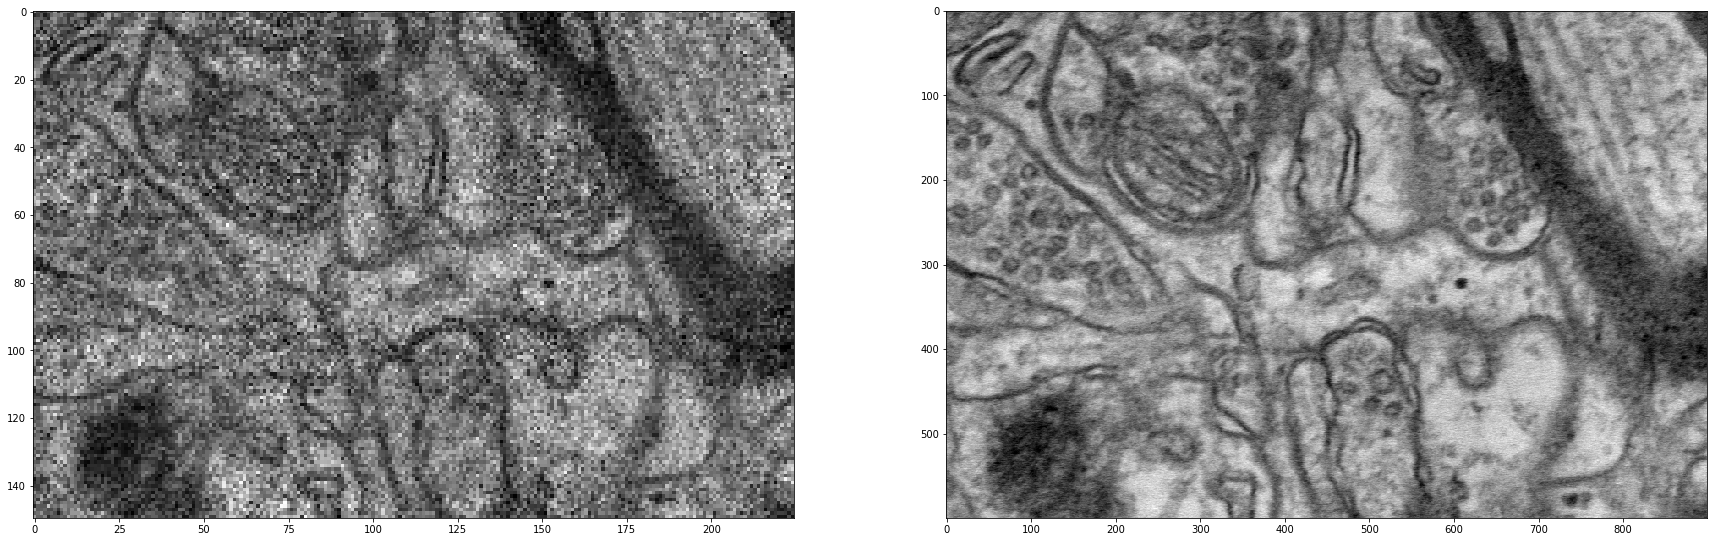

In [16]:
sn = 8 # image number
lr_im = data.utils.load_img(lr_files[sn]) # load image to tensor
hr_im = data.utils.load_img(hr_files[sn]) # load image to tensor
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
plt.show() # show visualizationiff.

## Compute SVD-compressed Image

In [8]:
def svd_process(img_files, output_dir, k_start=30, k_end=40):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    k_range = np.arange(k_start, k_end+1)
    ks = np.random.choice(k_range, size=len(img_files), replace=True)
    for i, img_fn in enumerate(img_files):
        img = data.utils.load_img(img_fn)  # load image
        svd_im = data.svd.compute_svd(img, k=ks[i])  # compute SVD image
        svd_im = 255.*(svd_im - np.min(svd_im))/np.ptp(svd_im)
        data.utils.save_img(svd_im, output_dir/(img_fn.stem+'.tif'))  # save SVD image
        if i % 1000 == 0:
            print(f'Completed {i} SVD Crappifications')
            print(f'Last file saved in {output_dir/img_fn.stem}')
    print("SVD Crappification Process Completed. Enjoy!")

In [9]:
svd_dir_name = f'training/trainsets/svd'
svd_dir_path = path/f'{svd_dir_name}_30_40'
svd_process(hr_files, svd_dir_path)

../../data/svd.py:23: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(np.flip(eigvals))


Completed 0 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_00001
Completed 2000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_02001
Completed 3000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_03001
Completed 4000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_04001
Completed 5000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_05001
Completed 6000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_06001
Completed 7000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_tra

Completed 62000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_62001
Completed 63000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_63001
Completed 64000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_64001
Completed 65000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_65001
Completed 66000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_66001
Completed 67000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30_40/EM_train_hr_67001
Completed 68000 SVD Crappifications
Last file saved in /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd_30

In [44]:
img_fn = hr_files[0]
svd_dir_path/img_fn

PosixPath('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00001.tif')

In [45]:
svd_dir_path/(img_fn.stem+'.tif')

PosixPath('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/svd/EM_train_hr_00001.tif')

# Questions for Andrew
- how to parallelize the SVD process function?
- if we can parallelize, how am I supposed to save them to file?

In [9]:
hr_im.shape

(1, 600, 900)

In [ ]:
# Go with HR SVD k=35-40

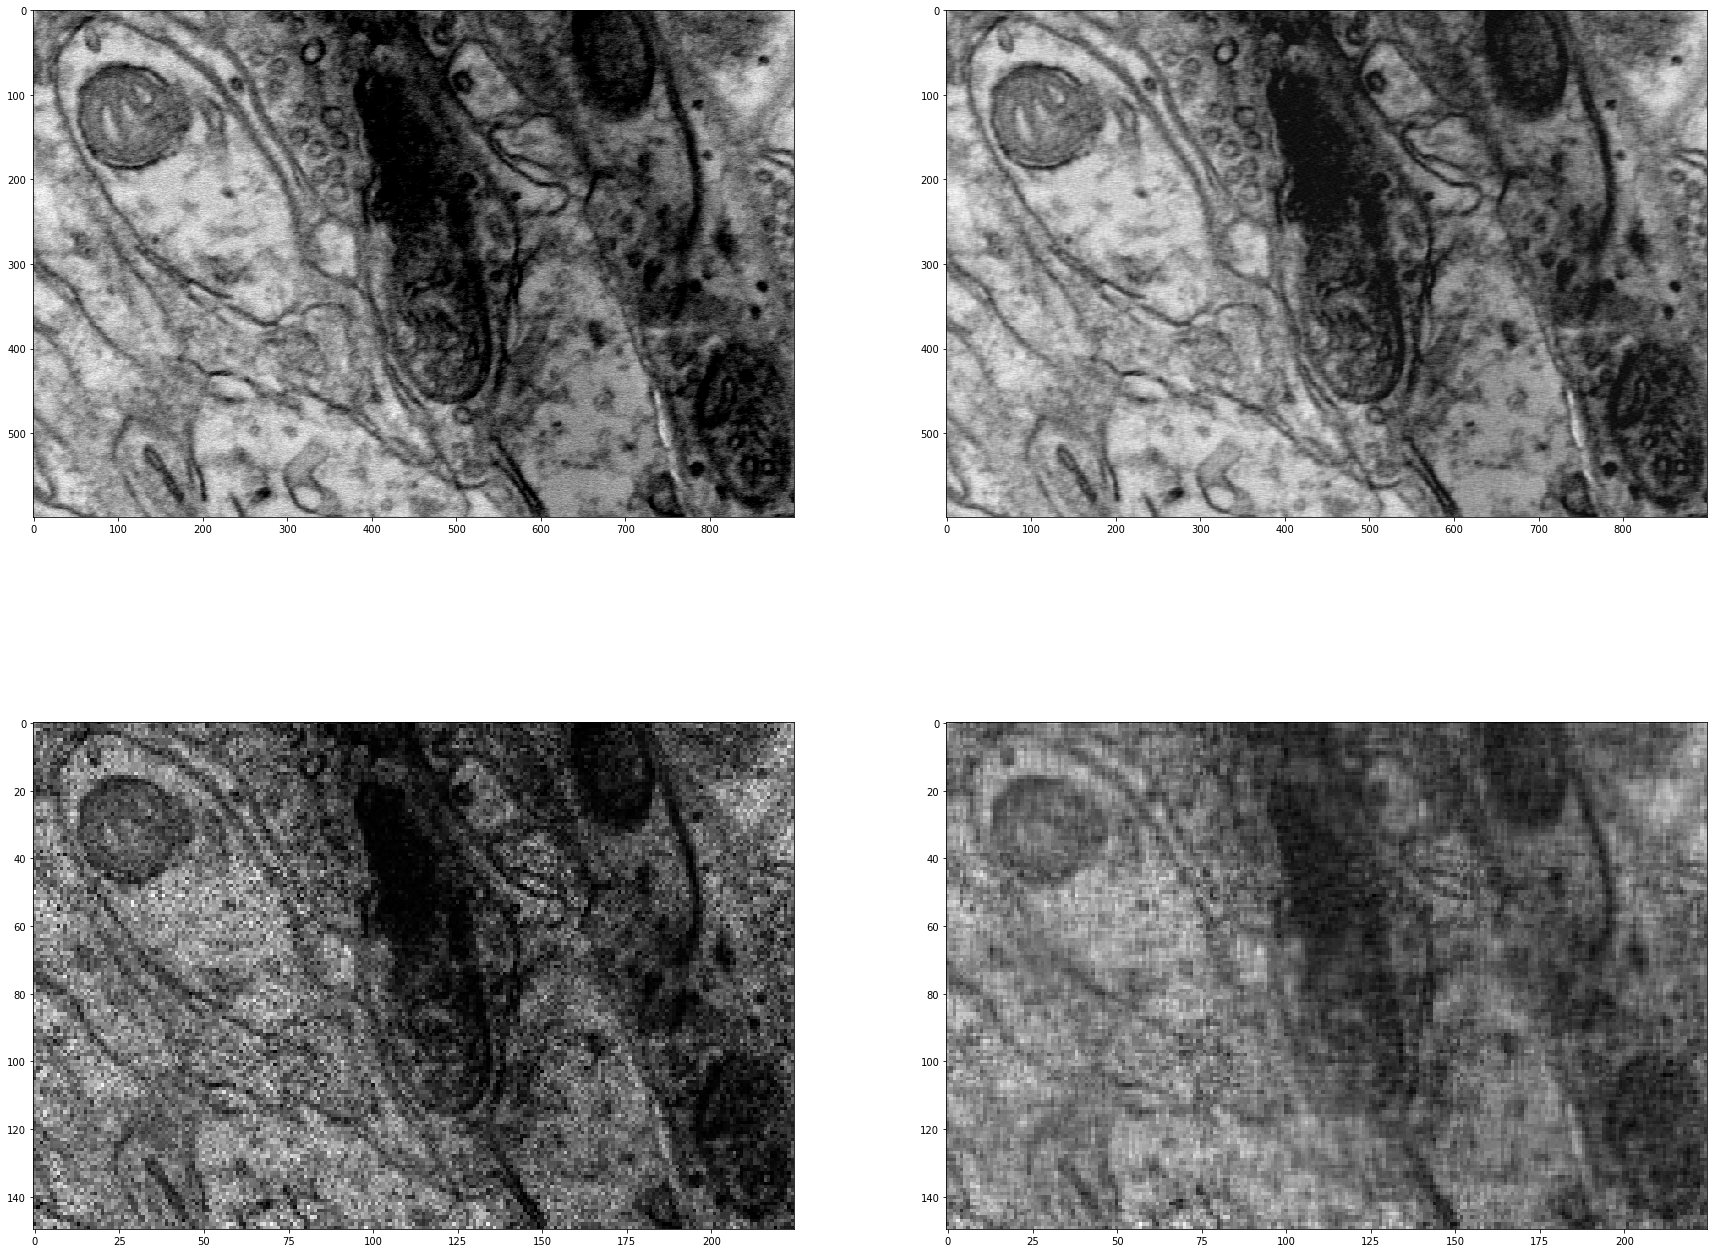

In [32]:
sn = 20 # image number
k1 = 30
k2 = 150
hr_im = data.utils.load_img(hr_files[sn])  # load HR image to tensor
lr_im = data.utils.load_img(lr_files[sn])  # load LR image to tensor
svd_lr_im = data.svd.compute_svd(lr_im, k=k1)  # compute svd image
svd_hr_im = data.svd.compute_svd(hr_im, k=k2)  # compute svd image
f, axarr = plt.subplots(2,2) # create visualizations
axarr[0][0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[0][1].imshow(np.squeeze(svd_hr_im), cmap=plt.cm.gray)  # visualize image tensor
axarr[1][0].imshow(np.squeeze(lr_im), cmap=plt.cm.gray)  # visualize image tensor
axarr[1][1].imshow(np.squeeze(svd_lr_im), cmap=plt.cm.gray)  # visualize image tensor

plt.show() # show visualization

In [31]:
hr_files[sn]

PosixPath('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00021.tif')

In [33]:
svd_im = 255.*(svd_hr_im - np.min(svd_hr_im))/np.ptp(svd_hr_im)
data.utils.save_img(svd_im, 'sample_EM_svd_150.tif')  # save SVD image

In [26]:
svd_hr_im = data.svd.compute_svd(hr_im, k=k2)  # compute svd image

../../data/svd.py:23: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(np.flip(eigvals))


In [28]:
t = PIL.Image.fromarray(np.squeeze(svd_hr_im))

In [32]:
t2 = 255.*(t - np.min(t))/np.ptp(t)

In [33]:
np.max(t2), np.min(t2)

(254.99998, 0.0)

In [34]:
t3 = data.utils.img_to_uint8(t2)

In [17]:
data.utils.save_img(svd_im, "svd_test.tif")

In [25]:
np.max(svd_hr_im), np.min(svd_hr_im)

(255.0, -17.960753705342228)

In [24]:
svd_hr_im *= 255 / np.max(svd_hr_im)

In [21]:
t = data.utils.img_to_uint8(svd_hr_im)

In [26]:
imageio.mimwrite("test.tiff", t, )

In [25]:
hr_files[sn]

PosixPath('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00009.tif')

In [30]:
im = PIL.Image.fromarray(np.squeeze(t))

In [31]:
im.save('test2.tif')

In [55]:
img = libtiff.TiffFile(hr_files[sn])

NotImplementedError: 'rgb'

In [50]:
t = img.get_tiff_array()[0]

In [51]:
t.shape

(600, 900)

# Load and Write using PIL (RGB)

In [59]:
im = PIL.Image.open(hr_files[sn])

In [60]:
im.load()

In [63]:
im

'RGB'

In [64]:
im.save('test3.tif')